In [1]:
from packaging import version

import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [2]:
experiment_id = "BLDETwf7RKO2VjK8wdADng"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

In [43]:
%config InlineBackend.figure_formats = ['svg']

mpl.style.use('ggplot')


plt.rcParams.update({
    "font.family": "STIXGeneral",
    "font.sans-serif": "Helvetica",
    "mathtext.fontset": "stix",
})

In [39]:
base_experiment = "Nov18_16-09-24_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0"


modes = [{
    "tag": "online/all",
    "title": "Online",
}, {
    "tag": "offline/all",
    "title": "Offline",
}, {
    "tag": "best-so-far/all",
    "title": "Best-so-far",
}]

experiments = {
    "1": [
        {
            "run": base_experiment,
            "label": "Caso 1",
        },
        {
            "run": "Nov18_17-47-32_PC_mode_single__w_0.5__0.5__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0",
            "label": "Caso 2",
        },
        {
            "run": "Nov18_19-36-12_PC_mode_single__w_0.3__0.7__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0",
            "label": "Caso 3",
        },                
    ],
    "2a": [
        {
            "run": base_experiment,
            "label": "Caso 1",
        },
        {
            "run": "Nov21_06-31-29_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.5_muta_0.5_migr_0.1_metro_0",
            "label": "Caso 2",
        },
        {
            "run": "Nov21_10-00-18_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.3_muta_0.7_migr_0.1_metro_0",
            "label": "Caso 3"
        },
    ],
    "2b": [
        {
            "run": base_experiment,
            "label": "Caso 1",
        },
        {
            "run": "Nov23_06-03-46_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.5_metro_0",
            "label": "Caso 2",
        },
        {
            "run": "Nov23_09-34-34_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.9_metro_0",
            "label": "Caso 3"
        },
    ],
    "3": [
        {
            "run": "Nov26_12-20-12_PC_mode_multi__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.5",
            "label": "Caso 1",
        },
        {
            "run": "Nov28_14-26-36_PC_mode_single__w_0.7__0.3__mr_0.1__mp_right_to_left__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Caso 2",
        },
        {
            "run": "Nov28_15-06-13_PC_mode_single__w_0.7__0.3__mr_0.1__mp_left_to_right__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Caso 3",
        },
    ],
    "4": [
        {
            "run": "Nov24_07-17-56_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.3",
            "label": "Caso 1",
        },
        {
            "run": "Nov24_08-39-10_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.5",
            "label": "Caso 2",
        },
        {
            "run": "Nov24_11-29-29_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0.7",
            "label": "Caso 3",
        },
    ],
    "5": [
        {
            "run": "Nov18_16-09-24_PC_mode_single__w_0.7__0.3__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1_metro_0",
            "label": "Single"
        },
        {
            "run": "Nov29_06-40-22_PC_mode_multi__w_0.5__0.5__mr_0.1__mp_bidirectional__gen_25__cros_0.7_muta_0.3_migr_0.1__metro_0.5",
            "label": "Multi",
        },
    ]
}

In [41]:
def plot_experiment(experiment, save=False):
    curves = experiments[experiment]
    len_modes = len(modes)
    markers = [".", "x", "^"]
    len_markers = len(markers)
    fig, axs = plt.subplots(1, len_modes, figsize=(10, 2), sharey=True)
    for index, mode in enumerate(modes):
        for index_curve, curve in enumerate(curves):
            data = df[(df["run"] == curve["run"]) & (df["tag"] == mode["tag"])]
            x, y = (data[["step", "value"]]).to_numpy().T
            axs[index].plot(x, y, label=curve["label"], marker=markers[index_curve % len_markers])
        if index == 0:
            axs[index].set_ylabel("time (s)")
        if index == 1:
            axs[index].set_xlabel("steps")
        axs[index].set_title(mode["title"], pad=15)
        axs[index].legend()
    plt.savefig(f'experiment_{experiment}.pdf', bbox_inches='tight', pad_inches=0)

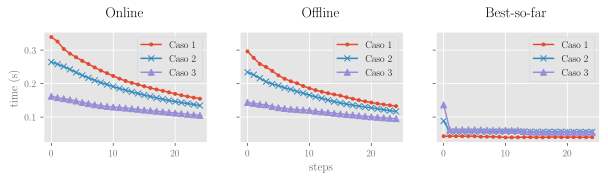

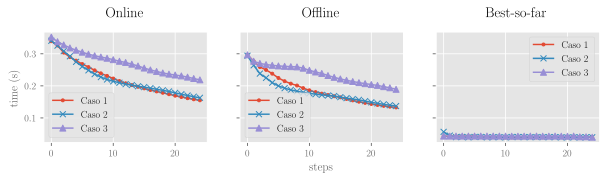

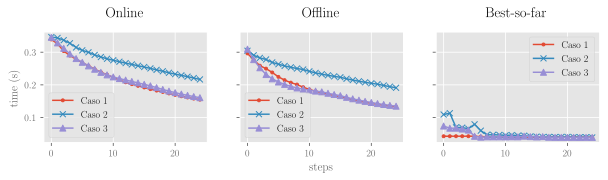

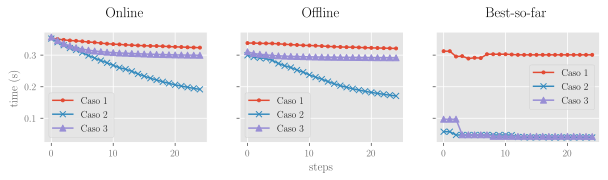

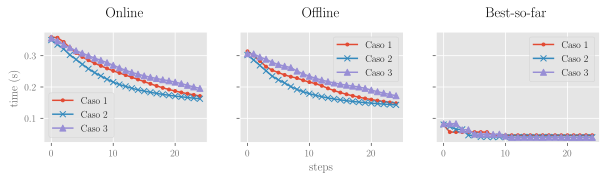

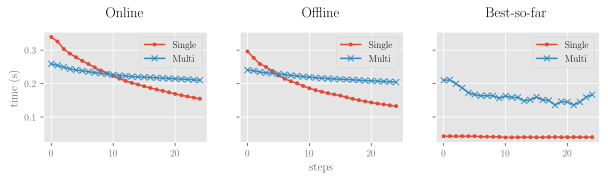

In [44]:
plot_experiment("1", save=True)
plot_experiment("2a", save=True)
plot_experiment("2b", save=True)
plot_experiment("3", save=True)
plot_experiment("4", save=True)
plot_experiment("5", save=True)